In [0]:
#Importing necessary libraris

import pandas as pd
import numpy as np
import csv
import folium

In [145]:
ktm_latitude=27.7172
ktm_longitude=85.3240

neighborhood=['Baluwatar','Baneshwor','Chabahil','Dillibazaar','Gairidhara',
              'Gyaneshwar','Kalimati','Lazimpat','Maru','Naxal',
              'Samakhusi','Sinamangal','Swayambhu','Thamel', 'Boudha', 
              'Patan', 'Jhamsikhel', 'Sanepa', 'Thapathali','Budhanilkantha',
              'Maharajgunj','Tilganga','Kupondole','Babar Mahal','Bhrikutimandap',
              'Ratnapark', 'Gaushala','Tripureshwor', 'Pulchowk','Basundhara','Kapan',
              'Jorpati','Lagankhel','Koteshwor','Satdobato']

neighborhood_latitude=[27.7255, 27.6915, 27.7166, 27.7054, 27.7191,
                       27.7102,27.7000, 27.7215,  27.7052, 27.7159, 
                       27.7273, 27.6991, 27.7192, 27.7154, 27.7213, 
                       27.6588, 27.6829,27.6844,27.6894,27.7654,
                       27.7365,27.7039,27.6862,27.6935,27.7010,
                       27.7066, 27.7085,27.6950,27.6782,27.7418,27.7360,
                       27.7278, 27.6660, 27.6756,27.6515]

neighborhood_longitude=[85.3298,  85.3420, 85.3485, 85.3267, 85.3262,
                        85.3330,85.2891, 85.3201,  85.3036,  85.3278, 
                        85.3175, 85.3511, 85.2955,  85.3123, 85.3575,
                        85.3247, 85.3020,85.3059,85.3227,85.3653,
                        85.3304,85.3508,85.3149,85.3243,85.3201,
                        85.3145, 85.3466,85.3149,85.3169, 85.3330,85.3601,
                        85.3782, 85.3227,85.3459,85.3278]

df=pd.DataFrame(list(zip(neighborhood, neighborhood_latitude, neighborhood_longitude)), columns=['Neighborhood','Latitude','Longitude'])

# create map of toronto neighbourhood using latitude and longitude values
ktm_map = folium.Map(location=[ktm_latitude, ktm_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ktm_map)  
    
ktm_map

In [197]:
df.head()

,Neighborhood,Latitude,Longitude
0,Baluwatar,27.7255,85.3298
1,Baneshwor,27.6915,85.3420
2,Chabahil,27.7166,85.3485
3,Dillibazaar,27.7054,85.3267
4,Gairidhara,27.7191,85.3262


In [146]:
#create GET request URL
import requests
CLIENT_ID = 'I5HYQK2UM15VPOYZJPJHCAIWNNDGEUBNPWLTIPDQ4SAUI43E' # your Foursquare ID
CLIENT_SECRET = 'YLXU4UZGUC54EXYOL5VJXV5JUYUOYWXUJMSESDNA5I1GA42R' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT=100 #limit of number of venues returned by FourSquare API
radius=500 #define radius
check_baneswor_lat=27.6915
check_baneswor_long= 85.3420
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, check_baneswor_lat, check_baneswor_long, VERSION, radius, LIMIT)
results=requests.get(url).json()
results

Your credentails:
CLIENT_ID: I5HYQK2UM15VPOYZJPJHCAIWNNDGEUBNPWLTIPDQ4SAUI43E
CLIENT_SECRET:YLXU4UZGUC54EXYOL5VJXV5JUYUOYWXUJMSESDNA5I1GA42R


{'meta': {'code': 200, 'requestId': '5ead4b6b0cc1fd001bfa5299'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-522ab6a911d247037a2809d8-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/billiards_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1e3931735',
         'name': 'Pool Hall',
         'pluralName': 'Pool Halls',
         'primary': True,
         'shortName': 'Billiards'}],
       'id': '522ab6a911d247037a2809d8',
       'location': {'cc': 'NP',
        'country': 'नेपाल',
        'distance': 495,
        'formattedAddress': ['नेपाल'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 27.69243621826172,
          'lng': 85.34691619873047}],
        'lat': 27.69243621826172,
        'lng': 85.34691619873047},
     

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [148]:
#Now we are ready to clean the json and structure it into a *pandas* dataframe.
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
   
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,baneshwor spa,Pool Hall,27.692436,85.346916


In [149]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


In [0]:
#lets create a function to repeat the same process to all neighbourhoods in Manhatten
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        results
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [151]:
# type your answer here

ktm_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Baluwatar
Baneshwor
Chabahil
Dillibazaar
Gairidhara
Gyaneshwar
Kalimati
Lazimpat
Maru
Naxal
Samakhusi
Sinamangal
Swayambhu
Thamel
Boudha
Patan
Jhamsikhel
Sanepa
Thapathali
Budhanilkantha
Maharajgunj
Tilganga
Kupondole
Babar Mahal
Bhrikutimandap
Ratnapark
Gaushala
Tripureshwor
Pulchowk
Basundhara
Kapan
Jorpati
Lagankhel
Koteshwor
Satdobato


In [152]:
#lets check the size of the resulting dataframe
print(ktm_venues.shape)
ktm_venues.head()
ktm_venues.dropna(axis=0)

(330, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Baluwatar,27.7255,85.3298,Midori Cafe,27.724202,85.331448,Café
1,Baluwatar,27.7255,85.3298,Mike's Breakfast,27.723658,85.331624,Breakfast Spot
2,Baluwatar,27.7255,85.3298,CAFÈ SOMA,27.727615,85.330521,Breakfast Spot
3,Baluwatar,27.7255,85.3298,Noyoz,27.721917,85.331277,Restaurant
4,Baluwatar,27.7255,85.3298,Buzz Cafe & Bar,27.722810,85.330888,Café
...,...,...,...,...,...,...,...
325,Lagankhel,27.6660,85.3227,"Tangal, Lalitpur",27.669731,85.324170,Sculpture Garden
326,Koteshwor,27.6756,85.3459,Bhat Bhateni Supermarket,27.675025,85.344486,Department Store
327,Koteshwor,27.6756,85.3459,Manohara River,27.678047,85.348580,River
328,Koteshwor,27.6756,85.3459,Pariwar Sweets,27.678387,85.348931,Vegetarian / Vegan Restaurant


In [153]:
#lets check how many venues were returned for each neighborhood
ktm_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Babar Mahal,13,13,13,13,13,13
Baluwatar,8,8,8,8,8,8
Baneshwor,1,1,1,1,1,1
Basundhara,6,6,6,6,6,6
Bhrikutimandap,3,3,3,3,3,3
Boudha,19,19,19,19,19,19
Budhanilkantha,1,1,1,1,1,1
Chabahil,4,4,4,4,4,4
Dillibazaar,8,8,8,8,8,8


In [154]:
## Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(ktm_venues['Venue Category'].unique())))

There are 89 uniques categories.


In [155]:
## Analyze Each Neighborhood
# one hot encoding
ktm_onehot = pd.get_dummies(ktm_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ktm_onehot['Neighborhood'] = ktm_venues['Neighborhood'] 
ktm_onehot.head()

,Airport Service,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Breakfast Spot,Buddhist Temple,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Casino,Chaat Place,Cheese Shop,Coffee Shop,Cuban Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food,Food Court,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gastropub,Golf Course,Gym,...,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Multiplex,Park,Performing Arts Venue,Pizza Place,Plaza,Pool,Pool Hall,Pub,Restaurant,River,Road,Rock Club,Roof Deck,Sandwich Place,Sculpture Garden,Shopping Mall,Soccer Field,Soccer Stadium,Spanish Restaurant,Spiritual Center,Steakhouse,Temple,Theme Park Ride / Attraction,Tibetan Restaurant,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Baluwatar
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Baluwatar
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Baluwatar
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Baluwatar
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Baluwatar


In [156]:
#get the neighborhood column to the front part
#get a list of columns
cols=list(ktm_onehot)

#move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Neighborhood')))

ktm_onehot=ktm_onehot.loc[:, cols]
ktm_onehot.head()

,Neighborhood,Airport Service,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Breakfast Spot,Buddhist Temple,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Casino,Chaat Place,Cheese Shop,Coffee Shop,Cuban Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food,Food Court,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gastropub,Golf Course,...,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Multiplex,Park,Performing Arts Venue,Pizza Place,Plaza,Pool,Pool Hall,Pub,Restaurant,River,Road,Rock Club,Roof Deck,Sandwich Place,Sculpture Garden,Shopping Mall,Soccer Field,Soccer Stadium,Spanish Restaurant,Spiritual Center,Steakhouse,Temple,Theme Park Ride / Attraction,Tibetan Restaurant,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Baluwatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baluwatar,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baluwatar,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baluwatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baluwatar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
#examine the new dataframe size
ktm_onehot.shape

(330, 90)

In [158]:
#let's group rows by neighborhood and take the mean of the frequency of each category

ktm_grouped=ktm_onehot.groupby('Neighborhood').mean().reset_index()
ktm_grouped

,Neighborhood,Airport Service,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Breakfast Spot,Buddhist Temple,Burger Joint,Bus Station,Bus Stop,Business Service,Café,Casino,Chaat Place,Cheese Shop,Coffee Shop,Cuban Restaurant,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food,Food Court,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Gastropub,Golf Course,...,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Multiplex,Park,Performing Arts Venue,Pizza Place,Plaza,Pool,Pool Hall,Pub,Restaurant,River,Road,Rock Club,Roof Deck,Sandwich Place,Sculpture Garden,Shopping Mall,Soccer Field,Soccer Stadium,Spanish Restaurant,Spiritual Center,Steakhouse,Temple,Theme Park Ride / Attraction,Tibetan Restaurant,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Babar Mahal,0.00,0.000000,0.153846,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.0,0.000000,0.000000,0.076923,0.076923,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.000000,0.00,0.00,0.076923,0.000000,0.000000,0.000000,0.00,0.076923,...,0.076923,0.000000,0.076923,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.076923,0.0,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
1,Baluwatar,0.00,0.000000,0.250000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
2,Baneshwor,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
3,Basundhara,0.00,0.166667,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
4,Bhrikutimandap,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.

In [159]:
#### Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in ktm_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ktm_grouped[ktm_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Babar Mahal----
                 venue  freq
0     Asian Restaurant  0.15
1    French Restaurant  0.08
2                Hotel  0.08
3  Japanese Restaurant  0.08
4           Restaurant  0.08


----Baluwatar----
              venue  freq
0    Breakfast Spot  0.38
1  Asian Restaurant  0.25
2              Café  0.25
3        Restaurant  0.12
4            Market  0.00


----Baneshwor----
         venue  freq
0    Pool Hall   1.0
1       Hostel   0.0
2         Pool   0.0
3        Plaza   0.0
4  Pizza Place   0.0


----Basundhara----
                  venue  freq
0    Frozen Yogurt Shop  0.17
1   Fried Chicken Joint  0.17
2   American Restaurant  0.17
3           Coffee Shop  0.17
4  Gym / Fitness Center  0.17


----Bhrikutimandap----
                          venue  freq
0         Performing Arts Venue  0.33
1    Tourist Information Center  0.33
2  Theme Park Ride / Attraction  0.33
3               Airport Service  0.00
4                        Lounge  0.00


----Boudha----
           ve

In [0]:
## Let's put that into a *pandas* dataframe
## First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [186]:
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ktm_grouped['Neighborhood']

for ind in np.arange(ktm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ktm_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Babar Mahal,Asian Restaurant,Cuban Restaurant,Plaza,Golf Course,Hotel,Indian Restaurant,Restaurant,Japanese Restaurant,French Restaurant,Department Store
1,Baluwatar,Breakfast Spot,Asian Restaurant,Café,Restaurant,Football Stadium,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant
2,Baneshwor,Pool Hall,Coffee Shop,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food
3,Basundhara,Coffee Shop,American Restaurant,Gym / Fitness Center,Frozen Yogurt Shop,Fried Chicken Joint,Bus Station,Food,Diner,Dumpling Restaurant,Eastern European Restaurant
4,Bhrikutimandap,Performing Arts Venue,Tourist Information Center,Theme Park Ride / Attraction,Women's Store,Food Court,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store


In [0]:
#Cluster Neighborhood
# set number of clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

ktm_grouped_clustering = ktm_grouped.drop('Neighborhood', 1)



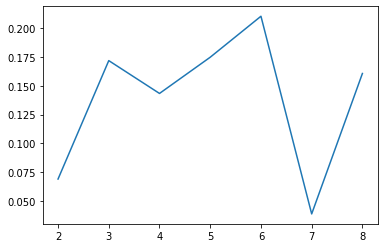

In [184]:
#Finding the best k value with the silhoutte method
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
sil=[]
kmax=8

for k in range(2, kmax+1):
  kmeanss=KMeans(n_clusters=k).fit(ktm_grouped_clustering)
  labels=kmeanss.labels_
  sil.append(silhouette_score(ktm_grouped_clustering, labels, metric='euclidean'))

k=[2,3,4,5,6,7,8]
plt.plot(k,sil)
plt.show()

In [188]:
#from silhouette graph,we conclude that the best number of clusters is 6. 

kclusters = 6
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ktm_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 2, 5, 1, 1, 1, 1, 1, 1], dtype=int32)

In [189]:
#Let's create a new dataframe that includes the cluster as well as 
#the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ktm_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
ktm_merged = ktm_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

ktm_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baluwatar,27.7255,85.3298,1,Breakfast Spot,Asian Restaurant,Café,Restaurant,Football Stadium,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant
1,Baneshwor,27.6915,85.3420,2,Pool Hall,Coffee Shop,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food
2,Chabahil,27.7166,85.3485,1,Food Court,Café,Multiplex,Shopping Mall,Food,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm
3,Dillibazaar,27.7054,85.3267,1,American Restaurant,Asian Restaurant,Multiplex,Men's Store,Café,Electronics Store,Fast Food Restaurant,Shopping Mall,Women's Store,Food Court
4,Gairidhara,27.7191,85.3262,1,Asian Restaurant,Café,Department Store,Restaurant,Coffee Shop,Hotel,Indian Restaurant,Lake,Liquor Store,Food


In [190]:
#Finally, let's visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[ktm_latitude, ktm_longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ktm_merged['Latitude'], ktm_merged['Longitude'], ktm_merged['Neighborhood'], ktm_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now,we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.


In [191]:
#Cluster 1
ktm_merged.loc[ktm_merged['Cluster Labels'] == 0]

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kalimati,27.7000,85.2891,0,Hotel,Casino,Indian Restaurant,Italian Restaurant,Café,Women's Store,Food Court,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
10,Samakhusi,27.7273,85.3175,0,Airport Service,Hostel,Asian Restaurant,Hotel,Football Stadium,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm
11,Sinamangal,27.6991,85.3511,0,Hotel,Athletics & Sports,Gastropub,Women's Store,Football Stadium,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm
12,Swayambhu,27.7192,85.2955,0,Hotel,Women's Store,Football Stadium,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food
18,Thapathali,27.6894,85.3227,0,Asian Restaurant,Hotel,Park,Electronics Store,Women's Store,Food Court,Diner,Dumpling Restaurant,Eastern European Restaurant,Farm
21,Tilganga,27.7039,85.3508,0,Hotel,Boarding House,Gastropub,Roof Deck,Food Court,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm


In [192]:
#Cluster 2
ktm_merged.loc[ktm_merged['Cluster Labels'] == 1] 


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baluwatar,27.7255,85.3298,1,Breakfast Spot,Asian Restaurant,Café,Restaurant,Football Stadium,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant
2,Chabahil,27.7166,85.3485,1,Food Court,Café,Multiplex,Shopping Mall,Food,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm
3,Dillibazaar,27.7054,85.3267,1,American Restaurant,Asian Restaurant,Multiplex,Men's Store,Café,Electronics Store,Fast Food Restaurant,Shopping Mall,Women's Store,Food Court
4,Gairidhara,27.7191,85.3262,1,Asian Restaurant,Café,Department Store,Restaurant,Coffee Shop,Hotel,Indian Restaurant,Lake,Liquor Store,Food
5,Gyaneshwar,27.7102,85.3330,1,Indian Restaurant,Dumpling Restaurant,Coffee Shop,Soccer Field,Women's Store,Food Court,Department Store,Diner,Eastern European Restaurant,Electronics Store
7,Lazimpat,27.7215,85.3201,1,Hotel,Café,Asian Restaurant,Restaurant,Himalayan Restaurant,Bar,Hotel Bar,Ice Cream Shop,Pub,Jazz Club
8,Maru,27.7052,85.3036,1,Restaurant,Historic Site,Café,Plaza,Hotel,Road,Market,Farm,Department Store,Diner
9,Naxal,27.7159,85.3278,1,Asian Restaurant,Restaurant,Department Store,American Restaurant,Gym,Bakery,Bar,Coffee Shop,Indian Restaurant,Café
14,Boudha,27.7213,85.3575,1,Restaurant,Café,Hotel,Casino,Buddhist Temple,Italian Restaurant,Indian Restaurant,Shopping Mall,Spanish Restaurant,Spiritual Center
15,Patan,27.6588,85.3247,1,Soccer Field,Athletics & Sports,Café,Farm,Department Store,Gym,Food,Diner,Dumpling Restaurant,Eastern European Restaurant


In [193]:
#Cluster 3
ktm_merged.loc[ktm_merged['Cluster Labels'] == 2] 


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Baneshwor,27.6915,85.342,2,Pool Hall,Coffee Shop,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food


In [194]:
#Cluster 4
ktm_merged.loc[ktm_merged['Cluster Labels'] == 3] 


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Kapan,27.736,85.3601,3,BBQ Joint,Women's Store,Football Stadium,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food


In [195]:
#Cluster 5
ktm_merged.loc[ktm_merged['Cluster Labels'] == 4] 


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Satdobato,27.6515,85.3278,4,Coffee Shop,Historic Site,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant,Food


In [196]:
#Cluster 6
ktm_merged.loc[ktm_merged['Cluster Labels'] == 5] 


,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Thamel,27.7154,85.3123,5,Hotel,Restaurant,Asian Restaurant,Italian Restaurant,Coffee Shop,Bar,Hookah Bar,Hostel,Pub,Halal Restaurant
16,Jhamsikhel,27.6829,85.3020,5,Football Stadium,Soccer Field,Bus Station,Japanese Restaurant,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm,Fast Food Restaurant
20,Maharajgunj,27.7365,85.3304,5,American Restaurant,Asian Restaurant,Frozen Yogurt Shop,Bus Station,Women's Store,Football Stadium,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm
25,Ratnapark,27.7066,85.3145,5,Women's Store,Park,Hotel,Bakery,Restaurant,Market,Café,Bus Station,Fast Food Restaurant,Dumpling Restaurant
26,Gaushala,27.7085,85.3466,5,Boarding House,Hotel,Chaat Place,Temple,Farm,Football Stadium,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
29,Basundhara,27.7418,85.3330,5,Coffee Shop,American Restaurant,Gym / Fitness Center,Frozen Yogurt Shop,Fried Chicken Joint,Bus Station,Food,Diner,Dumpling Restaurant,Eastern European Restaurant
31,Jorpati,27.7278,85.3782,5,Pool Hall,Trail,Bus Station,Food Court,Department Store,Diner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Farm
32,Lagankhel,27.6660,85.3227,5,Hotel,Restaurant,Indian Restaurant,Bus Station,Sculpture Garden,Women's Store,Food,Diner,Dumpling Restaurant,Eastern European Restaurant


From the cluster analysis, we can conclude that: 
1. Cluster 1 is suitable  for hotel, and is closer to airport. 
2. Cluster 2 is suitable for restaurant and dining purpose. 
3. Cluster 3 is most popular for recreational activites. 
4. Cluster 4 is popular for sports.
5. Cluster 5 is popular for coffee shops.
6. Cluster 6 is popular for shopping and recreational activities, the places in this cluster has high density of population.